In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# CSV dosyasını oku
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\veri madenciliği kodlar\bbc_news.csv")

In [5]:
# Hatalı tarihleri NaT yapar
df['pubDate'] = pd.to_datetime(df['pubDate'], errors='coerce')

In [7]:
df = df.dropna(subset=['pubDate'])

In [9]:
df.set_index('pubDate', inplace=True)

In [11]:
# Günlük ('D'), Haftalık ('W'), Aylık ('M') seçenekleri mevcut
df_resampled = df.resample('D').size()

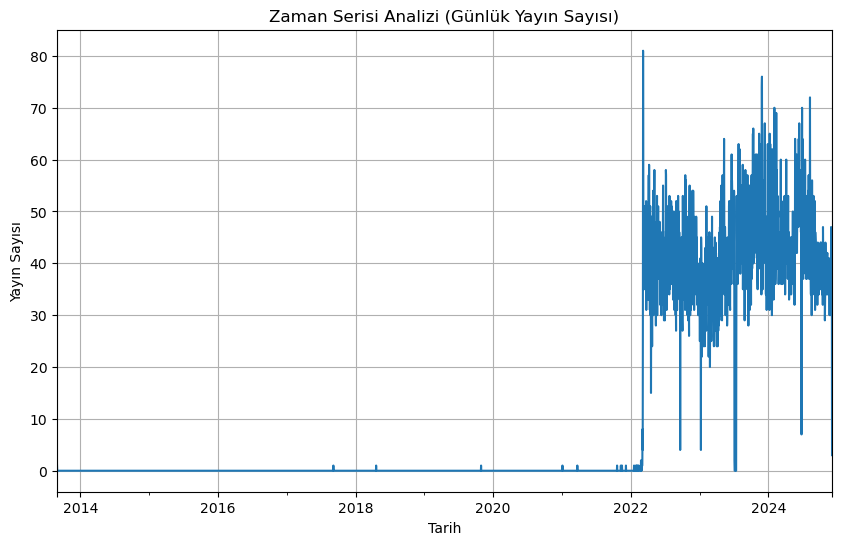

In [13]:
plt.figure(figsize=(10, 6))
df_resampled.plot()
plt.title("Zaman Serisi Analizi (Günlük Yayın Sayısı)")
plt.xlabel("Tarih")
plt.ylabel("Yayın Sayısı")
plt.grid(True)
plt.show()

In [15]:
print(df_resampled.describe())


count    4115.000000
mean       10.234508
std        18.640072
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        81.000000
dtype: float64


In [17]:
df_resampled_rolling = df_resampled.rolling(window=7).mean()


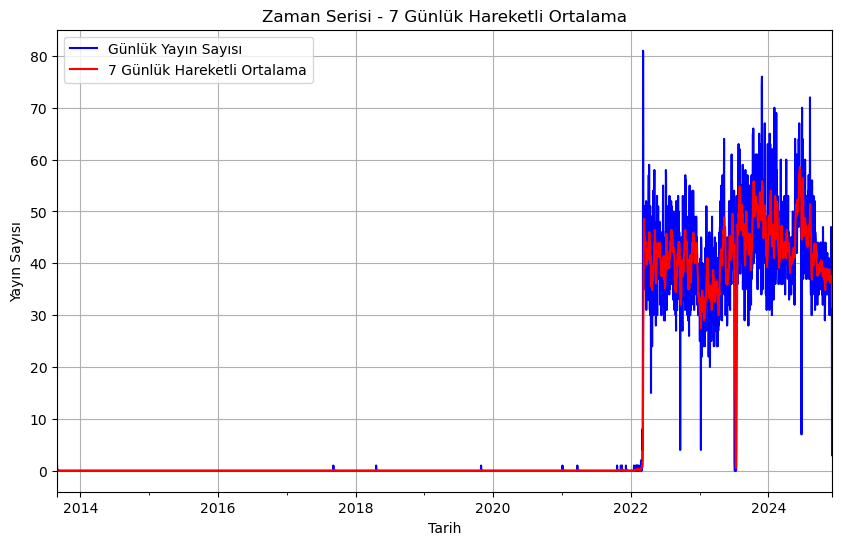

In [19]:
plt.figure(figsize=(10, 6))
df_resampled.plot(label='Günlük Yayın Sayısı', color='blue')
df_resampled_rolling.plot(label='7 Günlük Hareketli Ortalama', color='red')
plt.title("Zaman Serisi - 7 Günlük Hareketli Ortalama")
plt.xlabel("Tarih")
plt.ylabel("Yayın Sayısı")
plt.legend()
plt.grid(True)
plt.show()
